In [34]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
cities = ['Bishkek', 'Osh', 'Almaty', 'Nur-Sultan', 'Tashkent']
vacation_prefs = ['sea', 'mountains', 'city']
transport_prefs = ['plane', 'train', 'bus', 'car']
target_cities = ['Antalya', 'Dubai', 'Paris', 'Bangkok', 'New York']
data = []
for _ in range(1000):
    salary = random.randint(20000, 120000)
    city = random.choice(cities)
    age = random.randint(18, 65)
    vacation_prefer = random.choice(vacation_prefs)
    transport_prefer = random.choice(transport_prefs)
    target = random.choice(target_cities)
    data.append([salary, city, age, vacation_prefer, transport_prefer, target])

columns = ['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target']
df = pd.DataFrame(data, columns=columns)

df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer', 'target'], drop_first=True)

X = df.drop(columns=[col for col in df.columns if col.startswith('target_')])
y = df[[col for col in df.columns if col.startswith('target_')]].values.argmax(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")
print("\nКлассификационный отчет:")
print(classification_report(y_test, y_pred))



Точность модели: 0.29

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.38      0.60      0.47        81
           1       0.12      0.05      0.07        42
           2       0.16      0.07      0.10        42
           3       0.14      0.14      0.14        35

    accuracy                           0.29       200
   macro avg       0.20      0.22      0.19       200
weighted avg       0.24      0.29      0.25       200



In [35]:
from sklearn.metrics import confusion_matrix
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100] 
}
print("Сетка параметров:")
print(param_grid)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_log = grid_search.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred_log)))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Правильность на тестовом наборе: 0.41
Confusion matrix:
[[80  1  0  0]
 [41  1  0  0]
 [41  1  0  0]
 [34  0  0  1]]


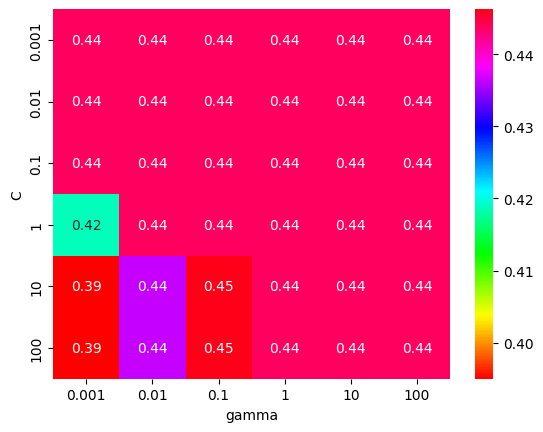

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
plt.show()

In [37]:
param_grid = [
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Логистическая регрессия: точность = {accuracy_log:.2f}")
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred_log)))

Логистическая регрессия: точность = 0.41
Confusion matrix:
[[81  0  0  0]
 [42  0  0  0]
 [42  0  0  0]
 [35  0  0  0]]


C:\Users\User\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))

Правильность на тестовом наборе: 0.40


In [41]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Логистическая регрессия: точность = {accuracy_log:.2f}")

Логистическая регрессия: точность = 0.41


In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [43]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test_pca, y_test)))

Правильность на тестовом наборе: 0.40


In [44]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_pca, y_train)
y_pred_log = log_reg.predict(X_test_pca)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Логистическая регрессия: точность = {accuracy_log:.2f}")

Логистическая регрессия: точность = 0.41


In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [46]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test_poly, y_test)))

Правильность на тестовом наборе: 0.39


In [47]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_poly, y_train)
y_pred_log = log_reg.predict(X_test_poly)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Логистическая регрессия: точность = {accuracy_log:.2f}")

Логистическая регрессия: точность = 0.34


In [48]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

In [49]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test_selected, y_test)))

Правильность на тестовом наборе: 0.41


In [50]:
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_selected, y_train)
y_pred_log = log_reg.predict(X_test_selected)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Логистическая регрессия: точность = {accuracy_log:.2f}")
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred_log)))

Логистическая регрессия: точность = 0.41
Confusion matrix:
[[81  0  0  0]
 [42  0  0  0]
 [42  0  0  0]
 [35  0  0  0]]


In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier


pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('smote', SMOTE(random_state=42)),  
    ('xgb', XGBClassifier(
        random_state=42, 
        eval_metric='mlogloss', 
        n_estimators=200, 
        max_depth=5, 
        learning_rate=0.1
    ))
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Точность на обучающих данных: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовых данных: {test_accuracy:.2f}")


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Точность на обучающих данных: 0.93
Точность на тестовых данных: 0.28

Confusion Matrix:
[[35  9 16 21]
 [19  6  5 12]
 [19  9  7  7]
 [19  3  6  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.43      0.40        81
           1       0.22      0.14      0.17        42
           2       0.21      0.17      0.18        42
           3       0.15      0.20      0.17        35

    accuracy                           0.28       200
   macro avg       0.24      0.24      0.23       200
weighted avg       0.27      0.28      0.27       200



Как видно из лабораторной работы никакие изменения и настройки не помогают улучшить точность, причем и логистическая регрессия, и случайный лес, и решетчатый поиск дают примерно одинаковые результаты, ответить на вопрос с чем это свяязанно можно довольно легко, дело в том, что мы сгенерировали дата сет случайно, поэтому у наших признаков абсолютно нет никакой связи с местом отдыха, то есть если бы взяли дата сет из реальной жизни, то признаки имели бы смысл, например более высокая зп - более дорогое место отдыха, и таким образом мы бы смогли предсказывать на новых данных, но в данном случае нет никакой закономерности